## Fields

In [9]:
# import packages
import sys
import os
from dotenv import load_dotenv
from IPython.display import display, HTML
import json
import matplotlib.pyplot as plt

# Load environment variables from .env file
load_dotenv()

# import the API builder
sys.path.append(os.path.abspath(".."))
from API_ScoutMaster_V2 import ScoutMasterAPI

In [10]:
# Scoutmaster API - Credentials
client_id = os.getenv('SM_CLIENT_ID')
client_secret = os.getenv('SM_CLIENT_SECRET')
project_id = os.getenv('SM_PROJECT_ID')

# Scoutmaster API - Init
SM_API = ScoutMasterAPI()
SM_API.authenticate(client_id=client_id, client_secret=client_secret)

✅ Successfully authenticated ScoutMaster API


In [11]:
output_folder = "../data/output/"

In [12]:
SM_API.output_format = 'df'
df_fields = SM_API.fields(project_id=project_id)
df_fields

,id,name,address,area_ha,geometry,created_at,deleted_at,properties,updated_at,country_code,reference_point
0,9c9d1492-101d-4090-bba3-70418d4527a3,19100101 Bio H60 perc 2B Baccara,"{'road': 'Urkerweg', 'state': 'Flevoland', 'co...",3.67,"POLYGON((5.66139283 52.67357268,5.66085925 52....",2025-06-16T16:42:56+00:00,None,{'area_in_ha': 3.67},2025-06-16T16:42:56+00:00,None,None
1,9b36ec5e-4e98-4f5f-b693-dd499c405e85,19100500 3,"{'road': 'Gastelsedijk Zuid', 'state': 'Noord-...",5.86,"POLYGON((4.4375921868 51.5880540814,4.43756686...",2025-06-16T16:54:23.294+00:00,None,{'area_in_ha': 5.86},2025-06-16T16:54:23.294+00:00,None,None
2,9c9d135c-8400-45b6-9b5f-93c4de02b1ab,19100800 03 kleine put,"{'road': 'Rubeerdijk', 'state': 'Noord-Brabant...",5.03,"POLYGON((4.25121522 51.56453145,4.25078451 51....",2025-06-16T16:43:54.551+00:00,None,{'area_in_ha': 5.03},2025-06-16T16:43:54.551+00:00,None,None
3,9c9d0d1e-9bc9-470f-ad28-733e2c771e2d,19100800 03 kleine put,"{'road': 'Rubeerdijk', 'state': 'Noord-Brabant...",5.03,"POLYGON((4.25121522 51.56453145,4.25078451 51....",2025-06-16T16:51:00.291+00:00,None,{'area_in_ha': 5.03},2025-06-16T16:51:00.291+00:00,None,None
4,9c9d0d22-ae89-4bc8-b554-14ad10e08331,19101000 MB 24 Stelleweg bos,"{'road': 'Stelleweg', 'state': 'Noord-Brabant'...",13.16,"POLYGON((4.31192544 51.6188344,4.3084146 51.61...",2025-06-16T16:50:59.274+00:00,None,{'area_in_ha': 13.16},2025-06-16T16:50:59.274+00:00,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1552,9cce20c6-b83e-42b7-b4ef-1e9e351c6da4,Perceel 20231367801,"{'road': 'De Schans', 'state': 'Noord-Brabant'...",7.92,"POLYGON((4.4808109133119 51.615196167473,4.483...",2025-06-16T16:35:28.096+00:00,None,"{'gewascode': 256, 'gws_gewas': 'Bieten, suike...",2025-06-16T16:35:28.096+00:00,None,None
1553,9cce1ffd-c34b-4867-b4af-1b8d70784401,Perceel 2023161786,"{'road': 'Stelleweg', 'state': 'Noord-Brabant'...",13.79,"POLYGON((4.2863283959669 51.624055923183,4.286...",2025-06-16T16:35:31.127+00:00,None,"{'gewascode': 2014, 'gws_gewas': 'Aardappelen,...",2025-06-16T16:35:31.127+00:00,None,None
1554,9cd0456b-2e84-461e-a503-fdaf383e21a6,Perceel 20231677137,"{'road': 'Vleetweg', 'town': 'Dronten', 'state...",9.76,"POLYGON((5.60797149003 52.415008366397,5.60899...",2025-06-16T16:35:24.083+00:00,None,"{'gewascode': 6660, 'gws_gewas': 'Uien, gele z...",2025-06-16T16:35:24.083+00:00,None,None
1555,9cce2046-3841-4514-ab19-a95ecd80e16d,Perceel 20232377537,"{'road': 'Stelleweg', 'state': 'Noord-Brabant'...",12.29,"POLYGON((4.2892784686958 51.621027771916,4.289...",2025-06-16T16:35:30.081+00:00,None,"{'gewascode': 256, 'gws_gewas': 'Bieten, suike...",2025-06-16T16:35:30.081+00:00,None,None


In [13]:
SM_API.output_format = 'geojson'
geojson_fields = SM_API.fields(project_id)

output_file =  output_folder + 'fields.geojson'
with open(output_file, "w") as f:
    if isinstance(geojson_fields, str):
        f.write(geojson_fields)
    else:
        # If it's a Python dict, convert to JSON first
        json.dump(geojson_fields, f, indent=2)

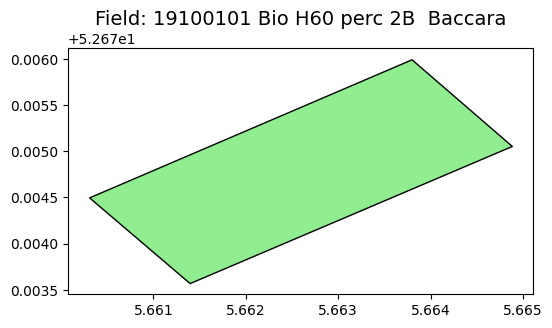

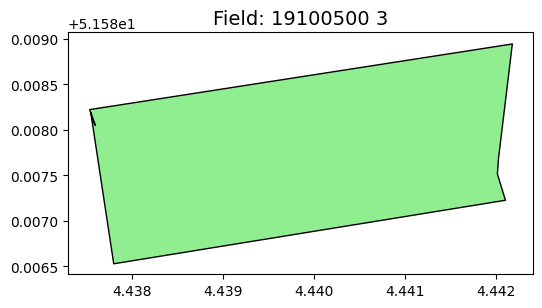

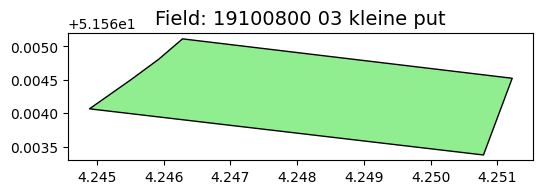

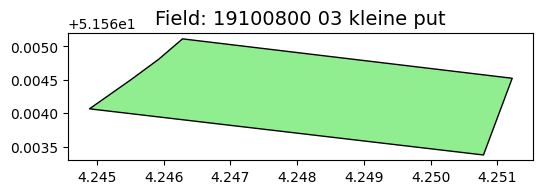

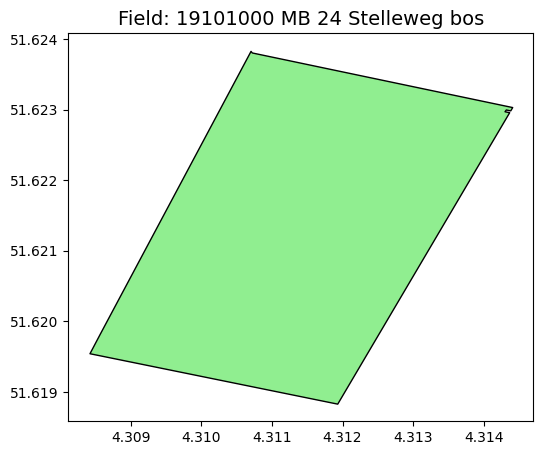

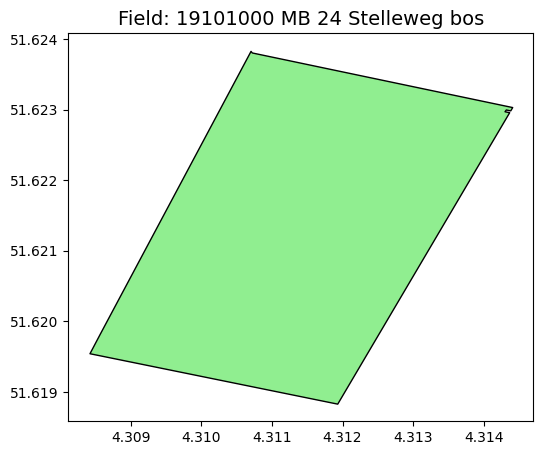

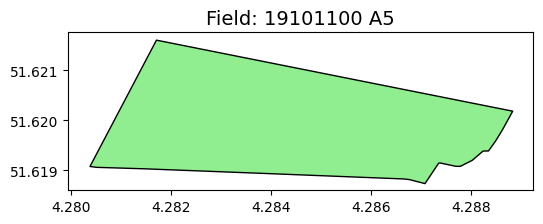

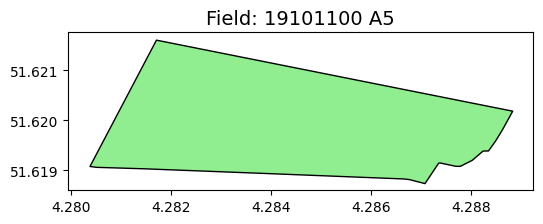

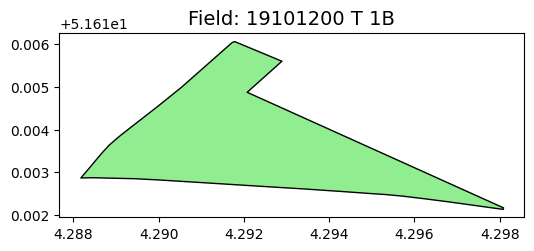

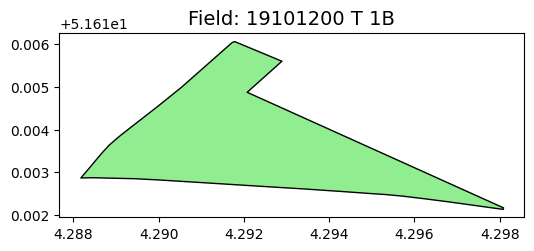

In [ ]:
SM_API.output_format = 'gdf'
gdf_fields = SM_API.fields(project_id=project_id)
gdf_fields_subset = gdf_fields.iloc[0:10]
for index, row in gdf_fields_subset.iterrows():
    # Select single row as GeoDataFrame
    gdf_field = gdf_fields_subset.loc[[index]]  # double brackets to keep it as GeoDataFrame

    # Get field name from row (replace 'field_name' with the actual column name)
    field_name = row['name']  
    # Plot
    ax = gdf_field.plot(figsize=(6, 6), edgecolor='black', facecolor='lightgreen')
    ax.set_title(f"Field: {field_name}", fontsize=14)
    plt.show()